<a href="https://colab.research.google.com/github/Gcc3186/Data-science-portfolio/blob/main/Uploading_HRRR_NPS_locations_and_plot_Rcode.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## README
This is a hybrid python-R script created to read and plot purple air data measurements located in National Parks. This routine reads and processes data from one intrument located in one park by loading a 'csv' file, creating a database, and ploting a timeseries. 🔥

In [1]:
## Import python libraries

import io # provides Python's main facilities for dealing with various types of I/O

import matplotlib.pyplot as plt # Matplotlib is a comprehensive library for 
                              # creating static, animated, and interactive visualizations 

import pandas as pd #pandas is a fast, powerful, flexible and easy to use 
                    # open source data analysis and manipulation tool, built on top 
                    # of the Python programming language. We are loading it as 'pd', 
                    # i.e we will use pd to call this library for now on

from google.colab import files # library to import 

## Execute special commands
%matplotlib inline 
                  # matplotlib is a magic '%' command which performs the necessary
                  # behind-the-scenes setup for IPython to work correctly 
                  # hand-in-hand with matplotlib library. The output of plotting 
                  # commands is displayed inline within frontends like the Jupyter notebook


## **MANDATORY STEP TO WORK WITH R:** Load R library on python (Rpy2) [Rpy2 website](https://rpy2.github.io/)
Before we start using R commands we need to load the R python extension. If you get an error message uncomment the first line (!pip install rpy2) and run it again.

In [2]:
# !pip install rpy2
%load_ext rpy2.ipython

## **STEP 1)** Upload the purple air file
Using python language to connect between the google colab notebook with local computer to load ".csv" files. Once you execute this cell it will show a buttom at the bottom of the cell called "Browse" where it will open your local machine directory. Load the purple air csv file. Ex. "YOSE2ChA.csv"

In [3]:
# Create variable to store the selected file 
uploaded = files.upload()


Saving YOSE2ChA_short.csv to YOSE2ChA_short.csv


After the variable "uploaded" is created, let's use the pandas library to create a dataframe called "df".  

 ## **STEP 2)** Using R to upload file 
After we upload the file into the system, let's use the R library to read it and create a dataframe.

In [66]:
## **IMPORTANT** Every cell containing R language should start with '%%R'. 
##  This is how you tell the notebok in what language you are writting.
%%R 

## import R libraries
# library.install(readr) # Uncomment and install if needed
library(readr)

# data1 <- read.csv('/content/drive/MyDrive/Colab Notebooks/NPS_points.csv',header=TRUE)
data1 <- read.csv('/content/YOSE2ChA.csv',header=TRUE)
# uploaded

In [6]:
%%R
## Check the data structure
str(data1)
names(data1)

'data.frame':	11 obs. of  10 variables:
 $ created_at      : chr  "2021-07-02 00:38:02 UTC" "2021-07-02 00:40:06 UTC" "2021-07-02 00:42:02 UTC" "2021-07-02 00:44:03 UTC" ...
 $ entry_id        : int  9527 9528 9529 9530 9531 9532 9533 9534 9535 9536 ...
 $ PM1.0_CF1_ug.m3 : num  10.8 10.1 10.1 10.3 10.3 ...
 $ PM2.5_CF1_ug.m3 : num  14 13.5 13.3 13.8 14.2 ...
 $ PM10.0_CF1_ug.m3: num  14.6 13.8 13.6 14.1 14.4 ...
 $ UptimeMinutes   : int  10 12 14 16 18 20 22 24 26 28 ...
 $ RSSI_dbm        : int  -70 -70 -70 -69 -74 -70 -72 -69 -67 -67 ...
 $ Temperature_F   : int  92 93 93 95 95 96 96 96 97 98 ...
 $ Humidity_.      : int  25 23 22 22 21 21 20 20 20 19 ...
 $ PM2.5_ATM_ug.m3 : num  14 13.5 13.3 13.8 14.2 ...
 [1] "created_at"       "entry_id"         "PM1.0_CF1_ug.m3"  "PM2.5_CF1_ug.m3" 
 [5] "PM10.0_CF1_ug.m3" "UptimeMinutes"    "RSSI_dbm"         "Temperature_F"   
 [9] "Humidity_."       "PM2.5_ATM_ug.m3" 


In [67]:
%%R
time <-c(data1['created_at'])
pm25 <-c(data1['PM2.5_ATM_ug.m3'])
humidity <-c(data1['Humidity_.'])

time <- as.Date(unlist(time))
pm25 <- as.numeric(unlist(pm25))
humidity <- as.numeric(unlist(humidity))


## STEP 3) Create scatterplot
I've stopped here becasue I think you know better how to plot a timeseries on R

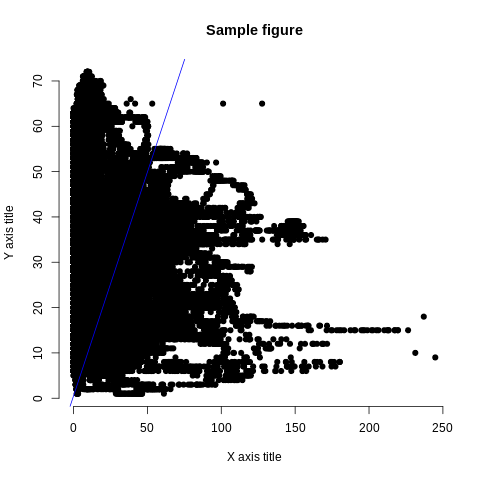

In [68]:
%%R
# Plot with main and axis titles
# Change point shape (pch = 19) and remove frame. # Add regression line

plot(pm25,humidity , main = "Sample figure",
     xlab = "X axis title", ylab = "Y axis title",
     pch = 19, frame = FALSE)
abline(lm(y ~ x, data = mtcars), col = "blue")